In [1]:
import supervision as sv
import numpy as np

In [2]:
prediction1 = sv.Detections.empty()

target1 = sv.Detections.empty()
target1.xyxy = np.array([[10, 20, 30, 40]])
target1.mask = None
target1.class_id = np.array([0]) 
target1.confidence = None

In [100]:
target2 = sv.Detections.empty()
target2.xyxy = np.array([[10, 20, 30, 40]])
target2.mask = None
target2.class_id = np.array([0])
target2.confidence = None

prediction2 = sv.Detections.empty()
prediction2.xyxy = np.array([[10, 20, 30, 40],[50,60,70,80], [200,220,230,240]])
prediction2.confidence = np.array([0.9,0.7,0.6])
prediction2.class_id = np.array([0,0,0])
predictions_list = [prediction1, prediction1, prediction1, prediction1, prediction2]
targets_list = [target1, target1, target1, target1, target2]

predictions_list = [prediction2]
targets_list = [target2]

In [101]:
from supervision.detection.utils import box_iou_batch
iou = box_iou_batch(predictions_list[-1].xyxy, targets_list[-1].xyxy)
iou

array([[1.],
       [0.],
       [0.]])

In [102]:
def match_detection_batch(
        predictions_classes: np.ndarray,
        target_classes: np.ndarray,
        iou: np.ndarray,
        iou_thresholds: np.ndarray,
    ) -> np.ndarray:
        num_predictions, num_iou_levels = (
            predictions_classes.shape[0],
            iou_thresholds.shape[0],
        )
        print(f"num_predictions: {num_predictions}, num_iou_levels: {num_iou_levels}")
        correct = np.zeros((num_predictions, num_iou_levels), dtype=bool)
        correct_class = target_classes[:, None] == predictions_classes
        print(f"correct_class: {correct_class}")

        for i, iou_level in enumerate(iou_thresholds):
            matched_indices = np.where((iou >= iou_level) & correct_class)
            print(f'matched_indices at iou_level {iou_level}: {matched_indices}')
            print(matched_indices[0].shape[0])
            if matched_indices[0].shape[0]:
                combined_indices = np.stack(matched_indices, axis=1)
                print(f'combined_indices: {combined_indices}')
                iou_values = iou[matched_indices][:, None]
                print(f'iou_values: {iou_values}')
                matches = np.hstack([combined_indices, iou_values])
                print(f'matches: {matches}')
                if matched_indices[0].shape[0] > 1:
                    matches = matches[matches[:, 2].argsort()[::-1]]
                    print(f'matches after sorting: {matches}')
                    matches = matches[np.unique(matches[:, 1], return_index=True)[1]]
                    print(f'matches after unique: {matches}')
                    matches = matches[np.unique(matches[:, 0], return_index=True)[1]]
                    print(f'matches after unique: {matches}')

                correct[matches[:, 1].astype(int), i] = True
                print(f'correct after matching: {correct}')

        return correct

In [103]:
np.where(np.array([[1],[0]]) & np.array([[1],[1]]))

(array([0]), array([0]))

In [104]:
np.where((np.array([[1],[0]]) >= 0.5) & np.array([[1,1]]))

(array([0, 0]), array([0, 1]))

In [105]:
matches = match_detection_batch(
    predictions_classes=predictions_list[-1].class_id,
    target_classes=targets_list[-1].class_id,
    iou=iou,
    iou_thresholds=np.linspace(0.5, 0.95, 10),
)
matches

num_predictions: 3, num_iou_levels: 10
correct_class: [[ True  True  True]]
matched_indices at iou_level 0.5: (array([0, 0, 0]), array([0, 1, 2]))
3
combined_indices: [[0 0]
 [0 1]
 [0 2]]


IndexError: index 1 is out of bounds for axis 1 with size 1

In [106]:
map = sv.metrics.MeanAveragePrecision()
map = map.update(predictions_list, targets_list)
map = map.compute()
map.map50

0.9999999999999999

In [89]:
predictions_list

[Detections(xyxy=array([[10, 20, 30, 40],
        [50, 60, 70, 80]]), mask=None, confidence=array([0.9, 0.7]), class_id=array([0, 0]), tracker_id=None, data={}, metadata={})]

In [90]:
targets_list

[Detections(xyxy=array([[ 10,  20,  30,  40],
        [100, 120, 130, 140]]), mask=None, confidence=None, class_id=array([0, 0]), tracker_id=None, data={}, metadata={})]

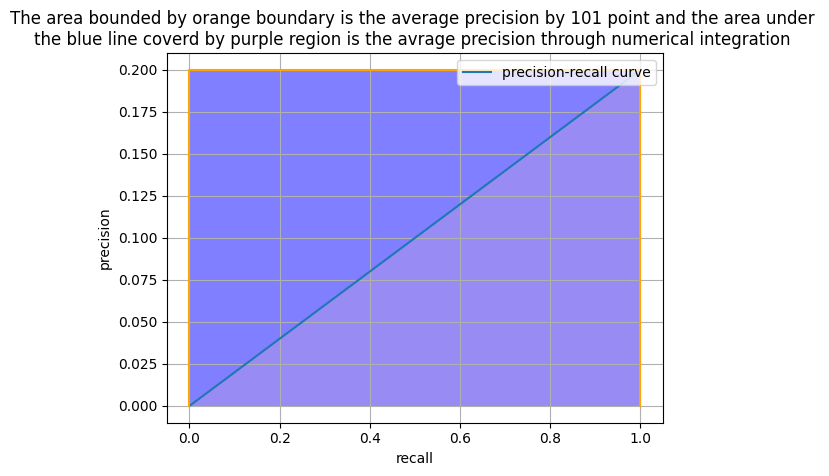

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot([0,1], [0, 0.2], label = 'precision-recall curve')
ax.plot([0,0,1,1],[0,0.2,0.2,0], color = 'orange')
ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.fill([0,0,1,1],[0,0.2,0.2,0], facecolor = 'blue',alpha = 0.5)
ax.fill([0,1,1], [0, 0.2,0], facecolor = 'pink', alpha = 0.2)
plt.legend(loc = 'upper right')
ax.set_title('The area bounded by orange boundary is the average precision by 101 point and the area under \n' \
'the blue line coverd by purple region is the avrage precision through numerical integration ')
ax.grid()

In [61]:
import supervision as sv
import numpy as np

# no ground truth exists but object is detected
target1 = sv.Detections.empty()

prediction1 = sv.Detections.empty()
prediction1.xyxy = np.array([[10, 20, 30, 40]])
prediction1.mask = None
prediction1.class_id = np.array([0]) 
prediction1.confidence = np.array([1])

# ground truth exists and object is detected correctly
target2 = sv.Detections.empty()
target2.xyxy = np.array([[10, 20, 30, 40]])
target2.mask = None
target2.class_id = np.array([0])
target2.confidence = None

prediction2 = target2
prediction2.confidence = np.array([1])

# 4 False Positives and 1 true positive
predictions_list = [prediction1, prediction1, prediction1, prediction1, prediction2]
targets_list = [target1, target1, target1, target1, target2]


map = sv.metrics.MeanAveragePrecision()
map = map.update(predictions_list, targets_list)
map = map.compute()
map.map50

0.9999999999999999

In [55]:
predictions_list

[Detections(xyxy=array([[10, 20, 30, 40]]), mask=None, confidence=array([1]), class_id=array([0]), tracker_id=None, data={}, metadata={}),
 Detections(xyxy=array([[10, 20, 30, 40]]), mask=None, confidence=array([1]), class_id=array([0]), tracker_id=None, data={}, metadata={}),
 Detections(xyxy=array([[10, 20, 30, 40]]), mask=None, confidence=array([1]), class_id=array([0]), tracker_id=None, data={}, metadata={}),
 Detections(xyxy=array([[10, 20, 30, 40]]), mask=None, confidence=array([1]), class_id=array([0]), tracker_id=None, data={}, metadata={}),
 Detections(xyxy=array([[10, 20, 30, 40]]), mask=None, confidence=array([1]), class_id=array([0]), tracker_id=None, data={}, metadata={})]

In [56]:
targets_list

[Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None, data={}, metadata={}),
 Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None, data={}, metadata={}),
 Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None, data={}, metadata={}),
 Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None, data={}, metadata={}),
 Detections(xyxy=array([[10, 20, 30, 40]]), mask=None, confidence=array([1]), class_id=array([0]), tracker_id=None, data={}, metadata={})]

In [7]:
predictions_list[0].xyxy, targets_list[0].xyxy

(array([[10, 20, 30, 40]]), array([], shape=(0, 4), dtype=float32))

In [12]:
stats = []

if stats:
    print('No')
    concatenated_stats = [np.concatenate(items, 0) for items in zip(*stats)]
    # average_precisions, unique_classes = self._average_precisions_per_class(
    #     *concatenated_stats
    # )
    # mAP_scores = np.mean(average_precisions, axis=0)
else:
    mAP_scores = np.zeros((10,), dtype=np.float32)
    # unique_classes = np.empty((0,), dtype=int)
    # average_precisions = np.empty((0, len(iou_thresholds)), dtype=np.float32)

In [47]:
from supervision.metrics.detection import MeanAveragePrecision as correct_map

map = correct_map.from_detections(predictions_list, targets_list)
map

MeanAveragePrecision(map50_95=0.5999999999999999, map50=0.6, map75=0.6, per_class_ap50_95=array([[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]]))